In [1]:
from bs4 import BeautifulSoup
import requests
import time, os

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [3]:
driver = webdriver.Chrome(chromedriver)

In [4]:
url= "https://www.nba.com/stats/players/bio/?sort=PLAYER_HEIGHT_INCHES&dir=1&Season=2020-21&SeasonType=Regular%20Season"

In [5]:
#note: may have to accept the cookies policy for cell to finish runnning
driver.get(url)

In [6]:
table = driver.find_element_by_tag_name('table')

In [7]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [8]:
name = []
height = []
weight = []

In [9]:
pages = list(range(1,12))

for i in pages: 
    for row in table.find_elements_by_tag_name('tr')[1:]:
        name.append(row.find_elements_by_tag_name('td')[0].text)
        height.append(row.find_elements_by_tag_name('td')[3].text)
        weight.append(row.find_elements_by_tag_name('td')[4].text)
    if i != 11:
        element=WebDriverWait(driver,20).until(EC.visibility_of_element_located((By.XPATH ,"//a[@class='stats-table-pagination__next']")))
        driver.execute_script("arguments[0].click();", element)
    else:
        break

In [10]:
# 540 = success
len(name)

540

In [11]:
driver.close()

In [12]:
import pandas as pd

In [13]:
d = {'Player':name,'Height':height,'Weight':weight}

In [14]:
df = pd.DataFrame(d)

In [15]:
reversed_names = df["Player"].str.split().apply(lambda x: ', '.join(x[::-1]))

In [16]:
reversed_names

0              Fall, Tacko
1        Marjanovic, Boban
2      Porzingis, Kristaps
3                 Bol, Bol
4             Kornet, Luke
              ...         
535      Campazzo, Facundo
536          Harper, Jared
537         Howard, Markus
538        Waters, Tremont
539         Thomas, Isaiah
Name: Player, Length: 540, dtype: object

In [17]:
df.insert(3,"Last_name_sorted",reversed_names)

In [18]:
df["Height"] = df.Height.astype(str)

In [19]:
def change_to_inches(height):
    res = height.replace("-"," ").split()
    value = (int(res[0])*12)+ int(res[1])
    return value

In [20]:
df["Height"] = df["Height"].apply(change_to_inches)

In [21]:
df

,Player,Height,Weight,Last_name_sorted
0,Tacko Fall,89,311,"Fall, Tacko"
1,Boban Marjanovic,88,290,"Marjanovic, Boban"
2,Kristaps Porzingis,87,240,"Porzingis, Kristaps"
3,Bol Bol,86,220,"Bol, Bol"
4,Luke Kornet,86,250,"Kornet, Luke"
...,...,...,...,...
535,Facundo Campazzo,70,195,"Campazzo, Facundo"
536,Jared Harper,70,175,"Harper, Jared"
537,Markus Howard,70,175,"Howard, Markus"
538,Tremont Waters,70,175,"Waters, Tremont"


In [22]:
df["Height"] = df.Height.astype(float)
df["Weight"] = df.Weight.astype(float)

In [23]:
df.sort_values("Last_name_sorted")

,Player,Height,Weight,Last_name_sorted
189,Precious Achiuwa,80.0,225.0,"Achiuwa, Precious"
523,Jaylen Adams,72.0,225.0,"Adams, Jaylen"
59,Steven Adams,83.0,265.0,"Adams, Steven"
104,Bam Adebayo,81.0,255.0,"Adebayo, Bam"
49,LaMarcus Aldridge,83.0,250.0,"Aldridge, LaMarcus"
...,...,...,...,...
331,Delon Wright,77.0,185.0,"Wright, Delon"
197,Thaddeus Young,80.0,235.0,"Young, Thaddeus"
517,Trae Young,73.0,180.0,"Young, Trae"
31,Cody Zeller,83.0,240.0,"Zeller, Cody"


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [25]:
nba_data0 = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2021_totals.html")[0]

In [26]:
nba_data0 = nba_data0[nba_data0["Player"]!="Player"]
nba_data0 = nba_data0.drop_duplicates(subset="Player",keep='first')
nba_data0 = nba_data0[["Player","FTA"]]

In [27]:
nba_data0.shape

(540, 2)

In [28]:
nba_data1 = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2021_per_game.html")[0]

In [29]:
nba_data1.shape

(731, 30)

In [30]:
nba_data1 = nba_data1[nba_data1["Player"]!="Player"]
nba_data1 = nba_data1.drop_duplicates(subset="Player",keep='first')

In [31]:
nba_data1.shape

(540, 30)

In [32]:
nba_data1.rename(columns={"eFG%":"eFG","FT%": "FT_perc","MP":"MP_pergame"},inplace=True)

In [33]:
nba_data1 = nba_data1[["Player","FT_perc","eFG","Pos","MP_pergame"]]

In [34]:
nba_data1

,Player,FT_perc,eFG,Pos,MP_pergame
0,Precious Achiuwa,.509,.544,PF,12.1
1,Jaylen Adams,NaN,.125,PG,2.6
2,Steven Adams,.444,.614,C,27.7
3,Bam Adebayo,.799,.571,C,33.5
4,LaMarcus Aldridge,.872,.525,C,25.9
...,...,...,...,...,...
724,Delon Wright,.802,.525,SG-PG,27.7
727,Thaddeus Young,.628,.568,PF,24.3
728,Trae Young,.886,.499,PG,33.7
729,Cody Zeller,.714,.565,C,20.9


In [35]:
nba_data2 = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2021_advanced.html")[0]
nba_data2 = nba_data2[nba_data2["Player"]!="Player"]
nba_data2 = nba_data2.drop_duplicates(subset="Player",keep='first')
nba_data2 = nba_data2[["Player","TOV%","ORB%","DRB%","AST%","STL%","BLK%","WS"]]
nba_data2.rename(columns={"TOV%":"TOV","ORB%":"ORB","DRB%":"DRB","AST%":"AST","STL%":"STL","BLK%":"BLK"},inplace=True)
nba_data2.shape

(540, 8)

In [36]:
nba_data2

,Player,TOV,ORB,DRB,AST,STL,BLK,WS
0,Precious Achiuwa,13.5,11.5,20.6,6.1,1.3,4.0,1.3
1,Jaylen Adams,0.0,0.0,16.9,12.7,0.0,0.0,-0.1
2,Steven Adams,17.5,14.4,20.4,9.1,1.6,2.2,4.0
3,Bam Adebayo,15.0,7.7,22.6,26.9,1.7,3.2,8.8
4,LaMarcus Aldridge,7.9,3.0,15.8,11.0,0.8,3.7,1.1
...,...,...,...,...,...,...,...,...
724,Delon Wright,12.6,4.1,13.1,23.0,2.8,1.5,4.3
727,Thaddeus Young,16.1,11.4,16.9,27.1,2.2,2.1,5.1
728,Trae Young,16.2,2.0,10.5,45.5,1.2,0.5,7.2
729,Cody Zeller,11.9,12.6,22.9,13.2,1.3,1.7,3.3


In [37]:
nba_data = nba_data2.merge(nba_data1,on="Player")
nba_data.shape

(540, 12)

In [38]:
nba_data = nba_data.merge(nba_data0,how="inner",on="Player")

In [39]:
nba_data.shape

(540, 13)

In [40]:
ser1 = df["Player"]
ser2 = nba_data["Player"]

In [41]:
union = pd.Series(np.union1d(ser1, ser2))
intersect = pd.Series(np.intersect1d(ser1, ser2))
notcommonseries = union[~union.isin(intersect)]
  
# displaying the result
print(notcommonseries)

9          Alen Smailagic
10         Alen Smailagić
17       Anderson Varejao
18       Anderson Varejão
29       Anzejs Pasecniks
              ...        
569         Wesley Iwundu
574     Willy Hernangomez
575     Willy Hernangómez
576        Xavier Tillman
577    Xavier Tillman Sr.
Length: 86, dtype: object


In [42]:
from unidecode import unidecode 

In [43]:
nba_data["Player"] = nba_data["Player"].apply(unidecode)

In [44]:
nba_data.loc[nba_data["Player"] == 'Brian Bowen',"Player"] = "Brian Bowen II"
nba_data.loc[nba_data["Player"] == 'Charlie Brown',"Player"] = "Charlie Brown Jr."
nba_data.loc[nba_data["Player"] == 'Danuel House',"Player"] = "Danuel House Jr."
nba_data.loc[nba_data["Player"] == 'Frank Mason III',"Player"] = "Frank Mason"
nba_data.loc[nba_data["Player"] == 'J.J. Redick', "Player"] = "JJ Redick"
nba_data.loc[nba_data["Player"] == 'James Ennis', "Player"] = 'James Ennis III'
nba_data.loc[nba_data["Player"] == 'Juan Hernangomez', "Player"] = "Juancho Hernangomez"
nba_data.loc[nba_data["Player"] == 'Kevin Knox', "Player"] = 'Kevin Knox II'
nba_data.loc[nba_data["Player"] == 'Harry Giles', "Player"] = 'Harry Giles III'
nba_data.loc[nba_data["Player"] == 'Lonnie Walker', "Player"] = "Lonnie Walker IV"
nba_data.loc[nba_data["Player"] == 'Marcus Morris', "Player"] = 'Marcus Morris Sr.'
nba_data.loc[nba_data["Player"] == 'Otto Porter', "Player"] = "Otto Porter Jr."
nba_data.loc[nba_data["Player"] == 'Robert Williams', "Player"] = 'Robert Williams III'
nba_data.loc[nba_data["Player"] == 'Robert Woodard', "Player"] = "Robert Woodard II"
nba_data.loc[nba_data["Player"] == 'Sviatoslav Mykhailiuk', "Player"] = "Svi Mykhailiuk"
nba_data.loc[nba_data["Player"] == 'Wesley Iwundu', "Player"] = "Wes Iwundu"
nba_data.loc[nba_data["Player"] == 'Xavier Tillman Sr.', "Player"] = "Xavier Tillman"

In [45]:
nba_data = nba_data.merge(df)

In [46]:
#empty notcommonseries = success
union = pd.Series(np.union1d(ser1, ser2))
intersect = pd.Series(np.intersect1d(ser1, ser2))
notcommonseries = union[~union.isin(intersect)]

print(notcommonseries)

Series([], dtype: object)


In [47]:
nba_data = nba_data[["Player","Pos","TOV","ORB","DRB","WS","AST","STL","BLK","FT_perc","eFG","FTA","Height","Weight","MP_pergame"]]

In [48]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 539
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      540 non-null    object 
 1   Pos         540 non-null    object 
 2   TOV         540 non-null    object 
 3   ORB         540 non-null    object 
 4   DRB         540 non-null    object 
 5   WS          540 non-null    object 
 6   AST         540 non-null    object 
 7   STL         540 non-null    object 
 8   BLK         540 non-null    object 
 9   FT_perc     522 non-null    object 
 10  eFG         539 non-null    object 
 11  FTA         540 non-null    object 
 12  Height      540 non-null    float64
 13  Weight      540 non-null    float64
 14  MP_pergame  540 non-null    object 
dtypes: float64(2), object(13)
memory usage: 67.5+ KB


In [49]:
nba_data.dropna(subset=["Player","Pos","TOV","ORB","DRB","WS","AST","STL","BLK","FT_perc","eFG","FTA","Height","Weight","MP_pergame"], axis=0, inplace=True)

In [50]:
nba_data.shape

(522, 15)

In [51]:
nba_data["TOV"] = nba_data.TOV.astype(float)
nba_data["ORB"] = nba_data.ORB.astype(float)
nba_data["DRB"] = nba_data.DRB.astype(float)
nba_data["WS"] = nba_data.WS.astype(float)
nba_data["AST"] = nba_data.AST.astype(float)
nba_data["STL"] = nba_data.STL.astype(float)
nba_data["BLK"] = nba_data.BLK.astype(float)
nba_data["FT_perc"] = nba_data.FT_perc.astype(float)
nba_data["eFG"] = nba_data.eFG.astype(float)
nba_data["FTA"] = nba_data.FTA.astype(float)
nba_data["MP_pergame"] = nba_data.MP_pergame.astype(float)

nba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 539
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      522 non-null    object 
 1   Pos         522 non-null    object 
 2   TOV         522 non-null    float64
 3   ORB         522 non-null    float64
 4   DRB         522 non-null    float64
 5   WS          522 non-null    float64
 6   AST         522 non-null    float64
 7   STL         522 non-null    float64
 8   BLK         522 non-null    float64
 9   FT_perc     522 non-null    float64
 10  eFG         522 non-null    float64
 11  FTA         522 non-null    float64
 12  Height      522 non-null    float64
 13  Weight      522 non-null    float64
 14  MP_pergame  522 non-null    float64
dtypes: float64(13), object(2)
memory usage: 65.2+ KB


In [52]:
nba_data = nba_data[nba_data.FTA>40]

In [53]:
nba_data

,Player,Pos,TOV,ORB,DRB,WS,AST,STL,BLK,FT_perc,eFG,FTA,Height,Weight,MP_pergame
0,Precious Achiuwa,PF,13.5,11.5,20.6,1.3,6.1,1.3,4.0,0.509,0.544,110.0,80.0,225.0,12.1
2,Steven Adams,C,17.5,14.4,20.4,4.0,9.1,1.6,2.2,0.444,0.614,135.0,83.0,265.0,27.7
3,Bam Adebayo,C,15.0,7.7,22.6,8.8,26.9,1.7,3.2,0.799,0.571,354.0,81.0,255.0,33.5
4,LaMarcus Aldridge,C,7.9,3.0,15.8,1.1,11.0,0.8,3.7,0.872,0.525,47.0,83.0,250.0,25.9
6,Nickeil Alexander-Walker,SG,12.4,1.4,14.1,0.7,14.7,2.2,2.1,0.727,0.502,66.0,78.0,205.0,21.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Delon Wright,SG-PG,12.6,4.1,13.1,4.3,23.0,2.8,1.5,0.802,0.525,126.0,77.0,185.0,27.7
536,Thaddeus Young,PF,16.1,11.4,16.9,5.1,27.1,2.2,2.1,0.628,0.568,113.0,80.0,235.0,24.3
537,Trae Young,PG,16.2,2.0,10.5,7.2,45.5,1.2,0.5,0.886,0.499,546.0,73.0,180.0,33.7
538,Cody Zeller,C,11.9,12.6,22.9,3.3,13.2,1.3,1.7,0.714,0.565,119.0,83.0,240.0,20.9


In [54]:
nba_data.sort_values("MP_pergame",ascending=True)

,Player,Pos,TOV,ORB,DRB,WS,AST,STL,BLK,FT_perc,eFG,FTA,Height,Weight,MP_pergame
275,Nathan Knight,PF,10.8,10.8,17.3,0.4,4.0,1.6,3.2,0.800,0.400,55.0,82.0,253.0,8.5
13,Thanasis Antetokounmpo,SF,21.3,10.7,12.9,0.7,10.3,1.9,1.6,0.510,0.515,49.0,78.0,219.0,9.7
264,Mason Jones,SG,16.1,2.2,16.0,0.2,18.9,1.0,0.3,0.625,0.520,64.0,76.0,200.0,10.4
380,Onyeka Okongwu,C,14.3,11.5,18.0,1.9,4.4,1.9,4.8,0.632,0.644,57.0,80.0,235.0,12.0
0,Precious Achiuwa,PF,13.5,11.5,20.6,1.3,6.1,1.3,4.0,0.509,0.544,110.0,80.0,225.0,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,Harrison Barnes,PF,11.1,3.3,17.2,4.5,13.0,1.0,0.4,0.830,0.575,235.0,80.0,225.0,36.2
516,Russell Westbrook,PG,18.0,4.9,28.6,3.7,48.6,1.7,0.8,0.656,0.474,413.0,75.0,200.0,36.4
498,Fred VanVleet,SG,9.1,1.8,11.3,4.3,26.7,2.2,2.0,0.885,0.489,191.0,73.0,197.0,36.5
199,James Harden,PG-SG,16.8,2.5,20.6,7.0,44.4,1.6,1.8,0.861,0.548,323.0,77.0,220.0,36.6


In [55]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [56]:
#sns.pairplot(nba_data)

In [57]:
features = ["TOV","ORB","DRB","AST","STL","BLK","FT_perc","eFG","Height","Weight","MP_pergame"]
X = nba_data[features]
X = sm.add_constant(X)

y = nba_data["WS"]

lm = sm.OLS(y, X) 

lm=lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WS   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.76
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           1.16e-81
Time:                        05:55:37   Log-Likelihood:                -522.37
No. Observations:                 322   AIC:                             1069.
Df Residuals:                     310   BIC:                             1114.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4714      2.977     -5.868      0.000     -23.329     -11.613
TOV           -0.1090      0.026     -4.186      0.000      -0.160      -0.058
ORB            0.2090      0.036      5.834      0.000       0.138       0.279
DRB            0.0356      0.020      1.787      0.075      -0.004       0.075
AST            0.1032      0.012      8.331      0.000       0.079       0.128
STL            0.2611      0.152      1.713      0.088      -0.039       0.561
BLK           -0.0676      0.060     -1.118      0.264      -0.187       0.051
FT_perc        5.1075      0.964      5.296      0.000       3.210       7.005
eFG           19.2556      1.474     13.063      0.000      16.355      22.156
Height        -0.0065      0.040     -0.161      0.872      -0.086       0.073
Weight         0.0079      0.005      1.720      0.086      -0.001       0.017
MP_pergame     0.1191      0.013      8.952      0.000       0.093       0.145
==============================================================================
Omnibus:                       28.994   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.583
Skew:                           0.509   Prob(JB):                     8.52e-13
Kurtosis:                       4.763   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=16)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [60]:
split_and_validate(X,y)


Validation R^2 score was: 0.6219039706625178
Feature coefficient results: 

const : 0.00
TOV : -0.11
ORB : 0.23
DRB : 0.06
AST : 0.10
STL : 0.27
BLK : -0.14
FT_perc : 5.64
eFG : 17.85
Height : -0.02
Weight : 0.01
MP_pergame : 0.12


In [61]:
features = ["TOV","ORB","DRB","AST","FT_perc","eFG","MP_pergame"]
X = nba_data[features]
X = sm.add_constant(X)

y = nba_data["WS"]

lm = sm.OLS(y, X)

lm=lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WS   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     118.5
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           3.14e-84
Time:                        05:55:37   Log-Likelihood:                -525.93
No. Observations:                 322   AIC:                             1068.
Df Residuals:                     314   BIC:                             1098.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.2722      1.073    -15.159      0.000     -18.384     -14.160
TOV           -0.1020      0.026     -3.949      0.000      -0.153      -0.051
ORB            0.2170      0.033      6.567      0.000       0.152       0.282
DRB            0.0404      0.017      2.387      0.018       0.007       0.074
AST            0.1056      0.011      9.348      0.000       0.083       0.128
FT_perc        5.3483      0.959      5.576      0.000       3.461       7.235
eFG           18.9049      1.454     13.001      0.000      16.044      21.766
MP_pergame     0.1207      0.013      9.194      0.000       0.095       0.147
==============================================================================
Omnibus:                       27.366   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.775
Skew:                           0.486   Prob(JB):                     5.72e-12
Kurtosis:                       4.708   Cond. No.                         840.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
split_and_validate(X,y)


Validation R^2 score was: 0.6624951493184974
Feature coefficient results: 

const : 0.00
TOV : -0.11
ORB : 0.22
DRB : 0.06
AST : 0.10
FT_perc : 6.02
eFG : 17.23
MP_pergame : 0.12


In [63]:
#removal and height, weight, and BLK features positively affects the performance.
#since training appears to still be significantly higher than test, it may be overfit

In [64]:
#Lets adding in dummy variables, then perform a Lasso regression
features = ["TOV","ORB","DRB","AST","FT_perc","eFG","MP_pergame"]
X = nba_data[features]

In [65]:
nba_data['Pos'].value_counts()

SG       71
C        69
PG       62
PF       61
SF       48
SG-PG     2
SG-SF     2
SF-SG     2
PG-SG     1
PF-SF     1
SF-PF     1
C-PF      1
PF-C      1
Name: Pos, dtype: int64

In [66]:
nba_data.shape

(322, 15)

In [67]:
nba_data = nba_data[nba_data["Pos"]!="SF-PF"]
nba_data = nba_data[nba_data["Pos"]!="SG-PG"]
nba_data = nba_data[nba_data["Pos"]!="SG-SF"]
nba_data = nba_data[nba_data["Pos"]!="SF-SG"]
nba_data = nba_data[nba_data["Pos"]!="C-PF"]
nba_data = nba_data[nba_data["Pos"]!="PF-SF"]
nba_data = nba_data[nba_data["Pos"]!="PF-C"]
nba_data = nba_data[nba_data["Pos"]!="PG-SG"]

In [68]:
nba_data.shape

(311, 15)

In [69]:
pd.get_dummies(nba_data['Pos']).head()

,C,PF,PG,SF,SG
0,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
6,0,0,0,0,1


In [70]:
X2 = X.copy()

X2['Pos'] = nba_data['Pos']

split_and_validate(pd.get_dummies(X2, drop_first=True), y)


Validation R^2 score was: 0.6249014975812022
Feature coefficient results: 

TOV : -0.11
ORB : 0.25
DRB : 0.04
AST : 0.12
FT_perc : 6.57
eFG : 17.64
MP_pergame : 0.11
Pos_PF : 0.43
Pos_PG : -0.34
Pos_SF : 0.75
Pos_SG : -0.11


In [71]:
# did not improve model; won't include

In [72]:
#cross validation ---> check to make sure generalization is ok
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.69371621, 0.65476151, 0.72956563, 0.73524183, 0.68581334])

In [73]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [74]:
X_train.columns

Index(['TOV', 'ORB', 'DRB', 'AST', 'FT_perc', 'eFG', 'MP_pergame'], dtype='object')

In [75]:
X_train.shape

(192, 7)

In [76]:
X_val.shape

(65, 7)

In [77]:
X_test.shape

(65, 7)

In [78]:
##Standard Scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score

In [80]:
selected_columns = ["TOV","ORB","DRB","AST",
                    "FT_perc","eFG","MP_pergame"]

In [81]:
alphavec = 10**np.linspace(0,1,1000)
lasso_model = LassoCV(alphas = alphavec,cv=5)
#lasso_model.fit(X_train.loc[:,selected_columns], y_train)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([ 1.        ,  1.00230755,  1.00462042,  1.00693863,  1.00926219,
        1.01159111,  1.01392541,  1.01626509,  1.01861017,  1.02096066,
        1.02331658,  1.02567793,  1.02804473,  1.03041699,  1.03279473,
        1.03517796,  1.03756668,  1.03996091,  1.04236067,  1.04476597,
        1.04717682,  1.04959323,  1.05201522,  1.05444279,  1.05687597,
        1.05931476,  1.06175918,  1.06420924,  1.06666496,  1.06912634,
        1.0715...
        9.24625712,  9.2675933 ,  9.28897872,  9.31041349,  9.33189772,
        9.35343152,  9.37501502,  9.39664831,  9.41833153,  9.44006479,
        9.46184819,  9.48368187,  9.50556592,  9.52750047,  9.54948564,
        9.57152154,  9.59360829,  9.615746  ,  9.6379348 ,  9.6601748 ,
        9.68246612,  9.70480888,  9.72720319,  9.74964918,  9.77214697,
        9.79469667,  9.81729841,  9.8399523 ,  9.86265846,  9.88541702,
        9.9082281 ,  9.93109181,  9.95400829,  9.97697764, 10.        ]),
        cv=5)

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 217 to 446
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TOV         192 non-null    float64
 1   ORB         192 non-null    float64
 2   DRB         192 non-null    float64
 3   AST         192 non-null    float64
 4   FT_perc     192 non-null    float64
 5   eFG         192 non-null    float64
 6   MP_pergame  192 non-null    float64
dtypes: float64(7)
memory usage: 12.0 KB


In [83]:
list(zip(selected_columns, lasso_model.coef_))

[('TOV', -0.0),
 ('ORB', 0.0),
 ('DRB', 0.0),
 ('AST', 0.0),
 ('FT_perc', 0.0),
 ('eFG', 0.13342401856902697),
 ('MP_pergame', 0.11592546602047331)]

In [84]:
#test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])
test_set_pred = lasso_model.predict(X_te)

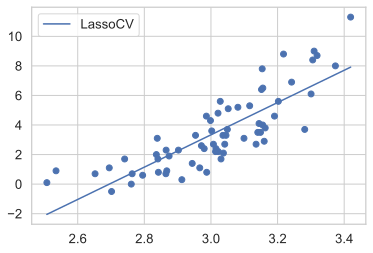

In [85]:
plt.scatter(test_set_pred, y_test)
x=test_set_pred
y=y_test
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,label="LassoCV")
plt.legend()

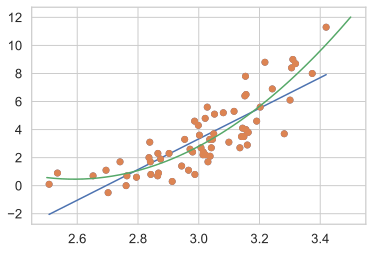

In [86]:
plt.scatter(test_set_pred, y_test)
x=test_set_pred
y=y_test
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,label=LassoCV)

poly = np.poly1d(np.polyfit(x, y, 2))
t = np.linspace(2.5,3.5,6000)
plt.plot(test_set_pred, y_test, "o", t, poly(t),label="polynomial fit")

In [87]:
1-r2_score((m*x) + b,x)

0.8774069303427643

In [88]:
1-r2_score(poly(t),t)

0.9266067974093367